In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
well = 570

# 570

## Тут со временем замера всё очень плохо: настоящих замеров 38 штук, и в области, где происходят выбросы, судя по всему, замеры происходили плохо

In [31]:
cs_d = pd.read_csv(f'data/{well}/init_edit/{well}_first_edit.csv')
cs_d['Время замера фактическое'].dropna().shape

(38,)

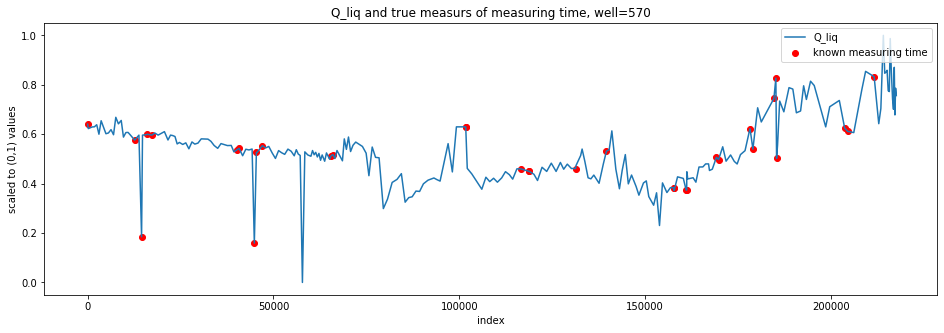

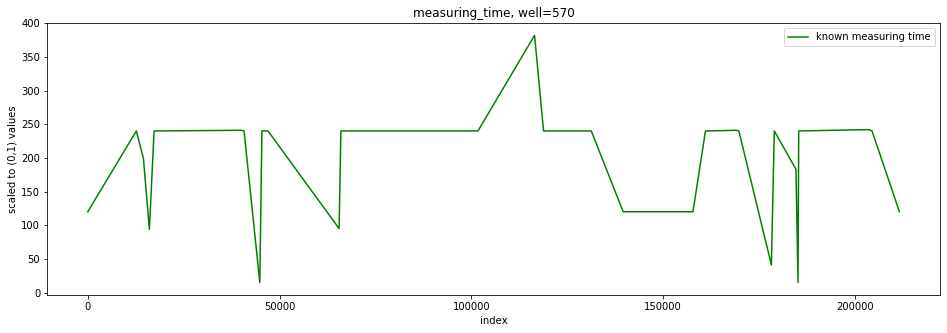

In [49]:
fig = plt.figure(figsize=(16,5))
sc = MinMaxScaler()
# строим дебит
plt.plot(cs_d['Объемный дебит жидкости'].dropna().index,
         sc.fit_transform(cs_d['Объемный дебит жидкости'].dropna().values.reshape((-1, 1))),
           label='Q_liq')

sc_data  = cs_d['Время замера фактическое'].dropna().to_frame().join(cs_d['Объемный дебит жидкости'].dropna().to_frame(),
                                                                     how='inner')
# строим флажки там где известно время замера
plt.scatter(sc_data['Объемный дебит жидкости'].dropna().index,
            sc.transform(sc_data['Объемный дебит жидкости'].dropna().values.reshape((-1, 1))), c='red',
           label='known measuring time')

plt.legend(loc='upper right')
plt.title(f'Q_liq and true measurs of measuring time, well={well}')
plt.ylabel('scaled to (0,1) values')
plt.xlabel('index')
plt.show()

pfig = plt.figure(figsize=(16,5))
plt.plot(sc_data.dropna().index,
            sc_data['Время замера фактическое'].dropna().values.reshape((-1, 1)), c='green',
            label='known measuring time')
plt.title(f'measuring_time, well={well}')
plt.ylabel('scaled to (0,1) values')
plt.xlabel('index')
plt.legend(loc='upper right')
plt.show()

Можно ли удалять выбросы на этой скважине, не основываясь на данных по замеру(их мало и они описывают не все аномалии)